<a href="https://colab.research.google.com/github/TanyashaVoron/stock_market_analysis/blob/main/.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Общий вывод данных - график + таблица

In [44]:
def print_data(name, alp_data_plot, alp_data_table):
  print_plot(alp_data_plot, name)
  print_table(alp_data_table)

## Построение графиков



In [45]:
import matplotlib.pyplot as plt

def print_plot(alp_data, name):
    plt.figure(figsize=(20, 5))  # Установка размера графика (ширина, высота)

    for label, data in alp_data.items():
        plt.plot(data, label=label, marker='o')

        # Подписываем значения в точках
        # for i, value in enumerate(data):
            # plt.text(i, value, f'{value:.2f}', fontsize=9, ha='center', va='bottom')

    # Настройка осей
    plt.xticks(ticks=range(len(data)))  # Отметки по оси X от 0 до n
    plt.yticks()  # Отметри на оси У


    plt.legend(
        bbox_to_anchor=(1.05, 1),  # Положение легенды: справа от графика
        loc='upper left',          # Выравнивание легенды относительно bbox_to_anchor
        borderaxespad=0.           # Расстояние между легендой и графиком
    )

    plt.tight_layout(rect=[0, 0, 0.85, 1])  # Оставляем место для легенды справа


    # Добавление легенды и отображение графика
    plt.legend()
    plt.title(name)  # Заголовок графика
    plt.grid()  # Добавление сетки
    plt.show()

## Построение таблиц

In [46]:
import pandas as pd
from tabulate import tabulate

def print_table(data_dict):
    for key in data_dict:
        data_dict[key] = [round(num, 3) for num in data_dict[key]]

    # Определяем максимальную длину массивов
    max_length = max(len(values) for values in data_dict.values())

    # Создаем новый словарь с дополненными массивами
    padded_data = {key: values + [None] * (max_length - len(values)) for key, values in data_dict.items()}

    # Создаем DataFrame из дополненного словаря
    df = pd.DataFrame(padded_data)

    # Добавляем нумерацию строк
    df.index.name = 'Номер строки'

    # Выводим таблицу
    print(tabulate(df, headers='keys', tablefmt='pretty'))

## Процент от основного датасета

In [47]:
def prosent(main_data, new_data):
  max_len_data = max(len(main_data), len(new_data))
  return [
        round(((main_data[i] / new_data[i] - 1) * 100), 2) if new_data[i] != 0 else None
        for i in range(max_len_data)
    ]

# Запрос на датасет

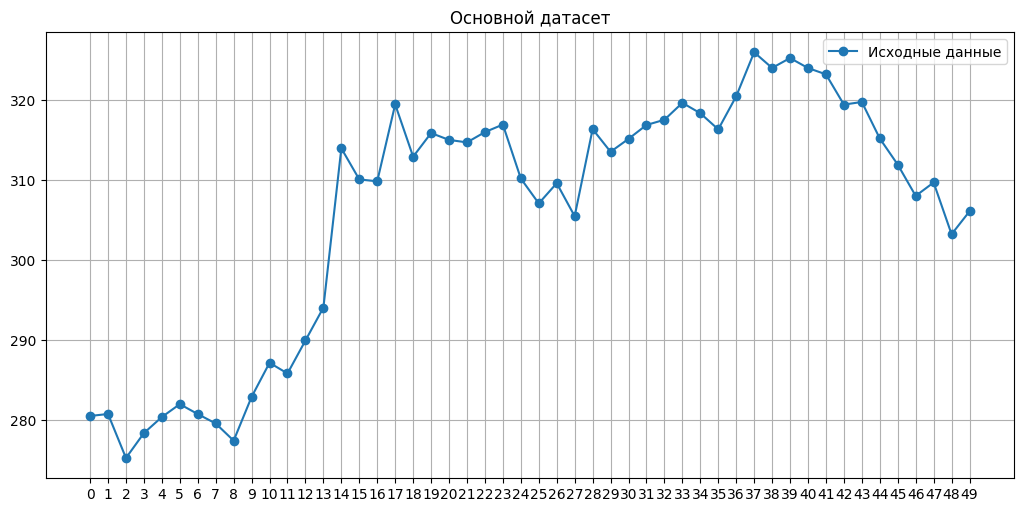

+--------------+-----------------+
| Номер строки | Исходные данные |
+--------------+-----------------+
|      0       |     280.49      |
|      1       |     280.74      |
|      2       |     275.23      |
|      3       |     278.35      |
|      4       |     280.36      |
|      5       |     281.97      |
|      6       |     280.73      |
|      7       |     279.55      |
|      8       |      277.4      |
|      9       |     282.88      |
|      10      |     287.15      |
|      11      |     285.81      |
|      12      |     289.94      |
|      13      |     294.06      |
|      14      |      314.0      |
|      15      |      310.1      |
|      16      |     309.87      |
|      17      |      319.5      |
|      18      |     312.95      |
|      19      |     315.91      |
|      20      |     315.05      |
|      21      |     314.74      |
|      22      |     316.03      |
|      23      |     316.97      |
|      24      |     310.22      |
|      25      |    

In [6]:
import requests
import pandas as pd
from datetime import datetime, timedelta
from tabulate import tabulate

# Определяем параметры
ticker = "SBER"
days = 70
  # Количество дней

# URL для запроса данных через API MOEX ISS
url = f'https://iss.moex.com/iss/history/engines/stock/markets/shares/boards/TQBR/securities/{ticker}.json'

# Вычисляем даты
end_date = datetime.today().strftime("%Y-%m-%d")
start_date = (datetime.today() - timedelta(days=days)).strftime("%Y-%m-%d")

# Параметры запроса
params = {
    "from": start_date,
    "till": end_date,
    "start": 0
}

# Отправляем GET-запрос
response = requests.get(url, params=params)

# Проверяем успешность запроса
if response.status_code == 200:
    data = response.json()
else:
    print("Ошибка запроса:", response.status_code)
    print(response.text)
    exit()

# Проверяем наличие данных
if "history" not in data or "data" not in data["history"] or not data["history"]["data"]:
    print("Нет актуальных данных за указанный период.")
    exit()

# Извлекаем данные
columns = data['history']['columns']
data = data['history']['data']

# Создаём DataFrame
df = pd.DataFrame(data, columns=columns)

# Оставляем только нужные столбцы: дата и цена закрытия
df = df[['TRADEDATE', 'CLOSE']].rename(columns={'TRADEDATE': 'Дата', 'CLOSE': 'Цена'})

# Сортировка DataFrame по дате
df = df.sort_values(by='Дата').reset_index(drop=True)

# Преобразуем цену в числовой тип
df['Цена'] = pd.to_numeric(df['Цена'], errors='coerce')

# Преобразуем дату в формат ДД.ММ.ГГ
df['Дата'] = pd.to_datetime(df['Дата']).dt.strftime('%d.%m.%Y')

data_main = df['Цена']

# Визуализация
data_print_main = {
        "Исходные данные": data_main
      }

print_data('Основной датасет', data_print_main, data_print_main)

# Анализ

* берем ряд из k элементов
* делим на три части в отношении 70/20/10
* первая часть это 70% элементов с начала ряда, обозначим n
* вторая часть это следующие 20%, обозначим m
* третья часть, это оставшиеся 10%, обозначим v

**Алгоритм**
* 1) Нужно через уравнение регрессии подобрать начальное значение x и y
* 2) берем первые n значений и находим оптимальные коэффициенты минимум суммы квадратов остатков по модели
* 3) проверяем адекватность модели:
 * 3.1) случайность остатков
 * 3.2) нормальность остатков - Критерий пинсона хи квадрат
 * 3.3) отсутствие автокорреляции - Статистика Дарвина Уотсона
* 4) берем ряд n и строим прогноз на количество шагов равное длине ряда m
* 5) проверяем точность модели - сравниваем прогноз с значениями ряда m (строим график)
* 6) берем ряд m и строим прогноз по подобранным ранее коэффициентам
* 7) проверяем точность модели - сравниваем прогноз с значениями ряда v (строим график)



# Алгоритм Хольта

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def double_exponential_smoothing_my(data, alpha, beta, a1, a2, steps=1):
    """
    Двойное экспоненциальное сглаживание (Holt's method).

    :param data: Список наблюдений (временной ряд)
    :param alpha: Параметр сглаживания уровня (0 < alpha <= 1)
    :param beta: Параметр сглаживания тренда (0 < beta <= 1)
    :param a1: Начальный уровень (intercept)
    :param a2: Начальный тренд (slope)
    :param steps: Количество шагов для прогноза в будущее (по умолчанию 1)
    :return: Список прогнозов
    """
    # Инициализация уровней и трендов
    l = [a1]  # Уровень (начинается с a1)
    b = [a2]  # Тренд (начинается с a2)

    forecasts = []  # Список для хранения прогнозов

    # Шаг 1: Обучение на исторических данных
    for t in range(len(data)):
        if t == 0:
            # Первый прогноз равен первому значению
            forecasts.append(data[0])
        else:
            # Обновление уровня
            l_new = alpha * data[t] + (1 - alpha) * (l[-1] + b[-1])
            l.append(l_new)

            # Обновление тренда
            b_new = beta * (l[-1] - l[-2]) + (1 - beta) * b[-1]
            b.append(b_new)

            # Прогноз на текущий шаг
            forecast = l[-1] + b[-1]
            forecasts.append(forecast)

    # Шаг 2: Прогнозирование на будущие шаги
    future_forecasts = []
    last_level = l[-1]
    last_trend = b[-1]

    for step in range(1, steps + 1):
        # Прогноз на будущий шаг
        future_forecast = last_level + step * last_trend
        future_forecasts.append(future_forecast)

    return forecasts + future_forecasts

## 1. Подготовка данных

In [16]:
def split_data(data, train_ratio=0.7, validation_ratio=0.2):
    """
    Разделяет данные на три части: тренировочную (train), валидационную (validation) и тестовую (test).

    :param data: Список данных (временной ряд)
    :param train_ratio: Доля тренировочной выборки (по умолчанию 0.7)
    :param validation_ratio: Доля валидационной выборки (по умолчанию 0.2)
    :return: Три списка: n (тренировочная), m (валидационная), v (тестовая)
    """
    k = len(data)
    n_size = int(train_ratio * k)
    m_size = int(validation_ratio * k)

    n = data[:n_size]
    m = data[n_size:n_size + m_size]
    v = data[n_size + m_size:]

    return n, m, v

## 2. Подбор начальных значений через регрессию

In [36]:
import numpy as np
from sklearn.linear_model import LinearRegression

def regression_initial_values(data):
    """
    Подбирает начальные значения x0 и y0 через линейную регрессию.

    :param data: Список данных (временной ряд)
    :return: Начальный уровень (a1) и начальный тренд (a2)
    """
    x = np.arange(len(data))
    y = np.array(data)

    # Линейная регрессия
    a2, a1 = np.polyfit(x, y, 1)

    return a1, a2

## 3. Оптимизация коэффициентов α и β

In [59]:
from itertools import product

def optimize_coefficients(data, a1, a2, step = 0.5):
    """
    Находит оптимальные значения коэффициентов методом полного перебора.

    :param data: Список данных (временной ряд)
    :param params_coef: Начальные коэффициенты
    :param params_start: Параметры для методы прогнозирования
    :param step: Шаг перебора значений коэффициентов (по умолчанию 0.01)
    :return: Оптимальные значения коэффициентов
    """
    best_params = None
    min_error = float('inf')  # Минимальная ошибка (сумма квадратов остатков)

    # Генерируем список значений для каждого параметра
    param_values = [np.arange(0 + step, 1, step) for _ in range(2)]

    # Перебираем все возможные комбинации параметров
    for params in product(*param_values):  # Все комбинации параметров
        # Вычисляем прогнозы с текущими параметрами
        forecasts = double_exponential_smoothing_my(data, params[0], params[1], a1, a2)

        # Вычисляем сумму квадратов остатков
        residuals = [data[i] - forecasts[i] for i in range(len(data))]
        error = sum(res ** 2 for res in residuals)

        # Обновляем лучшие параметры, если текущая ошибка меньше минимальной
        if error < min_error:
            min_error = error
            best_params = params

    return best_params

## 4. Проверка адекватности модели

In [84]:
import numpy as np
from scipy.stats import chi2

def check_model_adequacy_1(data, forecasts):
    """
    Проверяет адекватность модели по трем критериям:
    1. Случайность остатков.
    2. Нормальность остатков (критерий хи-квадрат Пирсона).
    3. Отсутствие автокорреляции (статистика Дарбина-Уотсона).

    :param data: Исходные данные (временной ряд)
    :param forecasts: Прогнозы модели
    :return: Результаты проверок (случайность, нормальность, автокорреляция)
    """
    # Вычисление остатков
    residuals = [data[i] - forecasts[i] for i in range(len(data))]

    # 1. Проверка случайности остатков (тест на поворотные точки)
    turning_points = sum(
        1 for i in range(1, len(residuals) - 1)
        if (residuals[i] > residuals[i - 1] and residuals[i] > residuals[i + 1]) or
           (residuals[i] < residuals[i - 1] and residuals[i] < residuals[i + 1])
    )
    expected_turning_points = (2 * (len(residuals) - 2)) / 3
    variance_turning_points = (16 * len(residuals) - 29) / 90
    z_score = abs((turning_points - expected_turning_points) / np.sqrt(variance_turning_points))
    randomness = z_score < 1.96  # Если z_score < 1.96, остатки случайны

    # 2. Проверка нормальности остатков (критерий хи-квадрат Пирсона)
    # Разделяем остатки на интервалы (бинирование)
    num_bins = int(np.sqrt(len(residuals)))  # Количество интервалов
    hist, bin_edges = np.histogram(residuals, bins=num_bins)
    observed_freq = hist  # Наблюдаемые частоты
    expected_freq = len(residuals) / num_bins  # Ожидаемые частоты

    # Вычисляем статистику хи-квадрат
    chi_square_stat = sum((observed_freq - expected_freq) ** 2 / expected_freq)
    degrees_of_freedom = num_bins - 1
    p_value_chi_square = chi2.sf(chi_square_stat, degrees_of_freedom)
    normality = p_value_chi_square > 0.05  # Если p-value > 0.05, остатки нормально распределены

    # 3. Проверка отсутствия автокорреляции (статистика Дарбина-Уотсона)
    dw_stat = sum((residuals[i] - residuals[i - 1]) ** 2 for i in range(1, len(residuals))) / sum(r ** 2 for r in residuals)
    autocorrelation = 1.5 < dw_stat < 2.5  # Если DW ∈ [1.5, 2.5], автокорреляции нет

    return randomness, z_score, normality, p_value_chi_square, autocorrelation, dw_stat, randomness * normality * autocorrelation

## 5. Проверка точности

In [94]:
import numpy as np

def calculate_forecast_accuracy(actual, predicted):
    """
    Вычисляет метрики точности прогноза: MAE, MSE, RMSE, MAPE.

    :param actual: Список или массив фактических значений
    :param predicted: Список или массив прогнозируемых значений
    :return: Словарь с метриками точности

    Метрики :
      MAE : Среднее значение абсолютных ошибок.
      MSE : Среднее значение квадратов ошибок.
      RMSE : Корень из MSE (более чувствителен к большим ошибкам).
      MAPE : Среднее значение процентных ошибок (только если нет нулевых значений).
    """
    # Проверка длин списков
    if len(actual) != len(predicted):
        raise ValueError("Длины списков фактических и прогнозируемых значений должны совпадать.")

    # Преобразование в массивы NumPy для удобства вычислений
    actual = np.array(actual)
    predicted = np.array(predicted)

    # Вычисление ошибок
    errors = actual - predicted
    absolute_errors = np.abs(errors)
    squared_errors = errors ** 2

    # MAE (Mean Absolute Error)
    mae = np.mean(absolute_errors)

    # MSE (Mean Squared Error)
    mse = np.mean(squared_errors)

    # RMSE (Root Mean Squared Error)
    rmse = np.sqrt(mse)

    # MAPE (Mean Absolute Percentage Error)
    # Проверяем, что в данных нет нулевых значений
    if np.any(actual == 0):
        mape = None  # MAPE не определён, если есть нулевые значения
    else:
        percentage_errors = np.abs(errors / actual) * 100
        mape = np.mean(percentage_errors)

    return mae, mse, rmse, mape

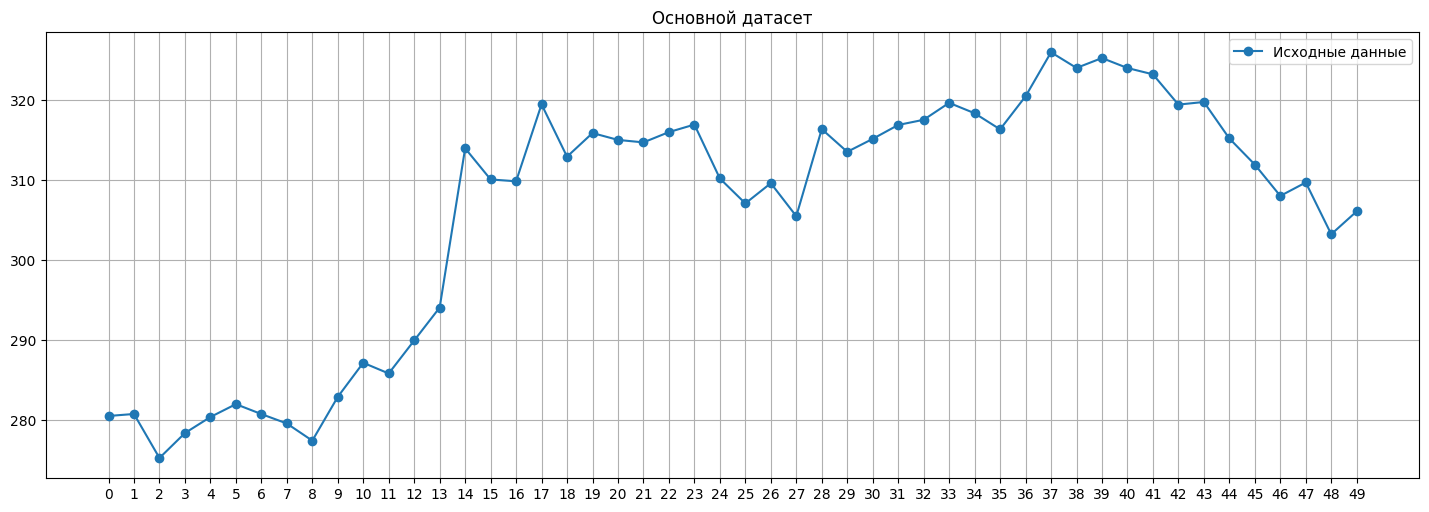

+--------------+-----------------+
| Номер строки | Исходные данные |
+--------------+-----------------+
|      0       |     280.49      |
|      1       |     280.74      |
|      2       |     275.23      |
|      3       |     278.35      |
|      4       |     280.36      |
|      5       |     281.97      |
|      6       |     280.73      |
|      7       |     279.55      |
|      8       |      277.4      |
|      9       |     282.88      |
|      10      |     287.15      |
|      11      |     285.81      |
|      12      |     289.94      |
|      13      |     294.06      |
|      14      |      314.0      |
|      15      |      310.1      |
|      16      |     309.87      |
|      17      |      319.5      |
|      18      |     312.95      |
|      19      |     315.91      |
|      20      |     315.05      |
|      21      |     314.74      |
|      22      |     316.03      |
|      23      |     316.97      |
|      24      |     310.22      |
|      25      |    

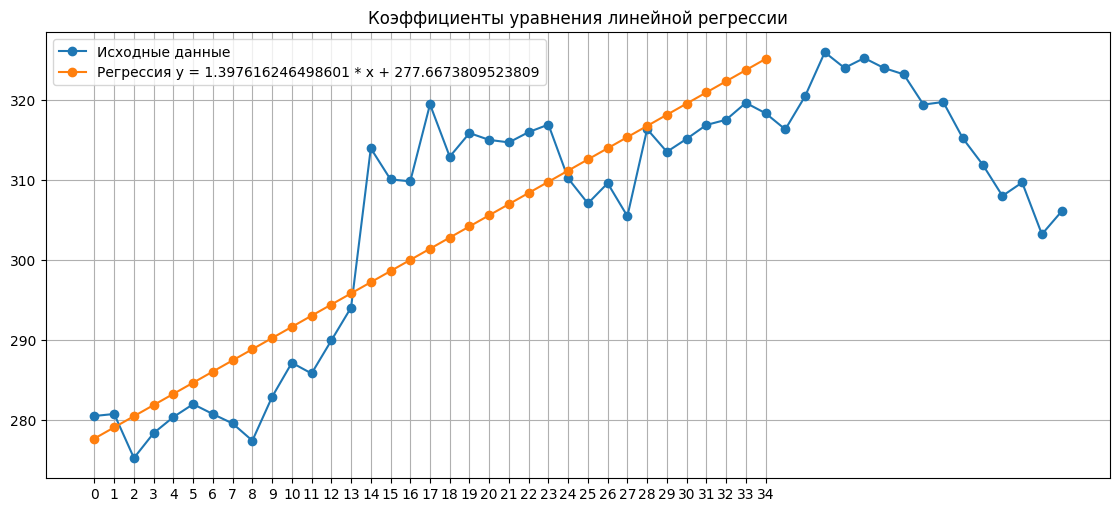

+--------------+-----------------+---------------------------------------------------------+
| Номер строки | Исходные данные | Регрессия y = 1.397616246498601 * x + 277.6673809523809 |
+--------------+-----------------+---------------------------------------------------------+
|      0       |     280.49      |                         277.667                         |
|      1       |     280.74      |                         279.065                         |
|      2       |     275.23      |                         280.463                         |
|      3       |     278.35      |                         281.86                          |
|      4       |     280.36      |                         283.258                         |
|      5       |     281.97      |                         284.655                         |
|      6       |     280.73      |                         286.053                         |
|      7       |     279.55      |                         287.451    

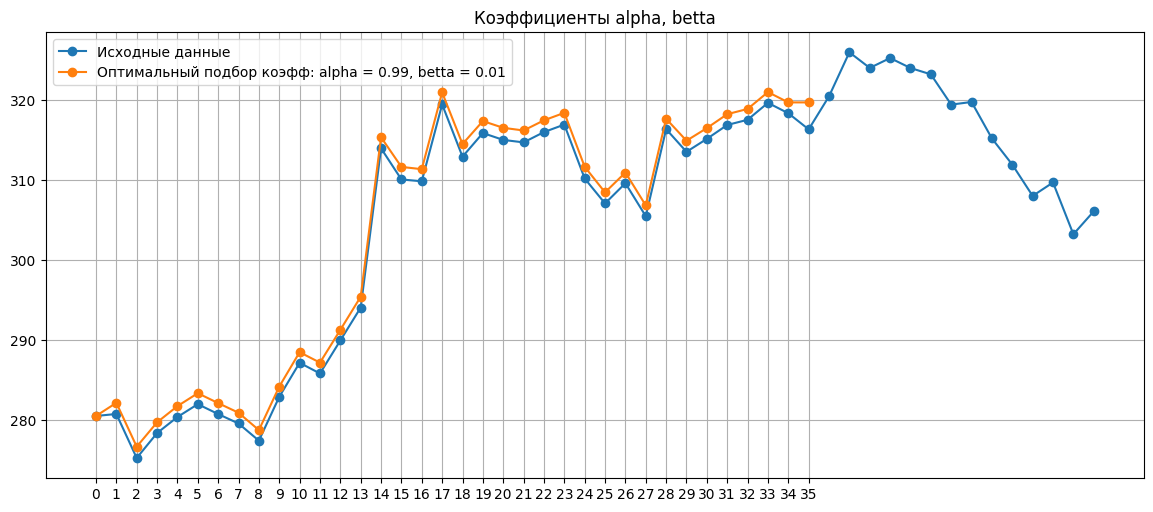

+--------------+-----------------+------------------------------------------------------+
| Номер строки | Исходные данные | Оптимальный подбор коэфф: alpha = 0.99, betta = 0.01 |
+--------------+-----------------+------------------------------------------------------+
|      0       |     280.49      |                        280.49                        |
|      1       |     280.74      |                       282.137                        |
|      2       |     275.23      |                       276.645                        |
|      3       |     278.35      |                       279.696                        |
|      4       |     280.36      |                       281.723                        |
|      5       |     281.97      |                       283.339                        |
|      6       |     280.73      |                       282.102                        |
|      7       |     279.55      |                       280.896                        |
|      8  

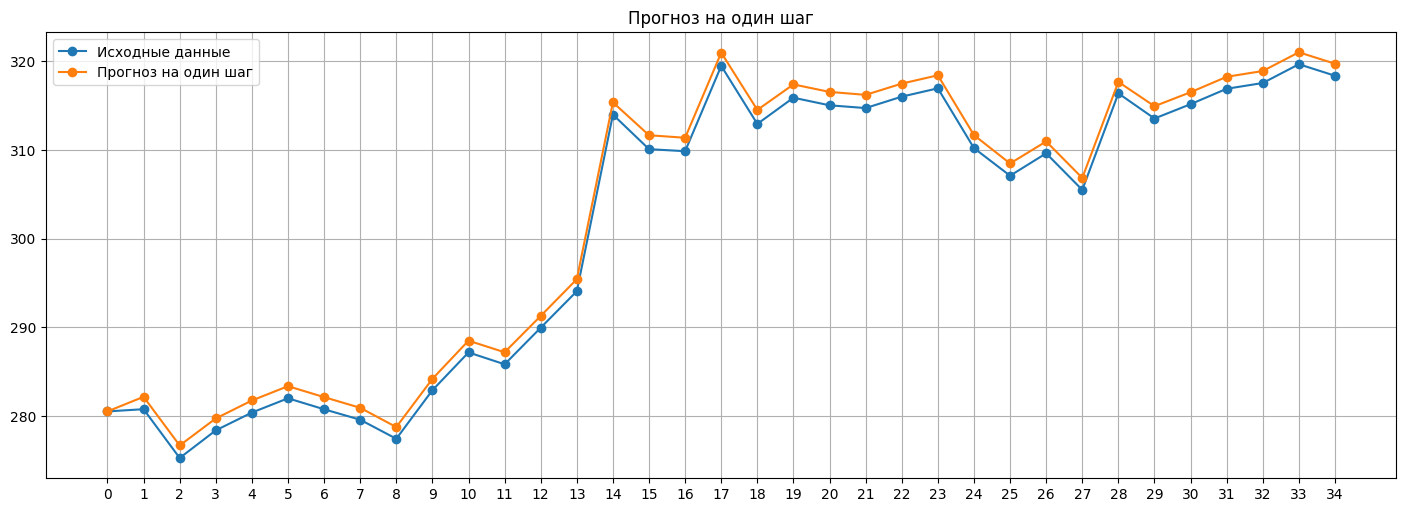

+--------------+-----------------+---------------------+
| Номер строки | Исходные данные | Прогноз на один шаг |
+--------------+-----------------+---------------------+
|      0       |     280.49      |       280.49        |
|      1       |     280.74      |       282.137       |
|      2       |     275.23      |       276.645       |
|      3       |     278.35      |       279.696       |
|      4       |     280.36      |       281.723       |
|      5       |     281.97      |       283.339       |
|      6       |     280.73      |       282.102       |
|      7       |     279.55      |       280.896       |
|      8       |      277.4      |       278.721       |
|      9       |     282.88      |       284.166       |
|      10      |     287.15      |       288.477       |
|      11      |     285.81      |       287.167       |
|      12      |     289.94      |       291.27        |
|      13      |     294.06      |       295.418       |
|      14      |      314.0    

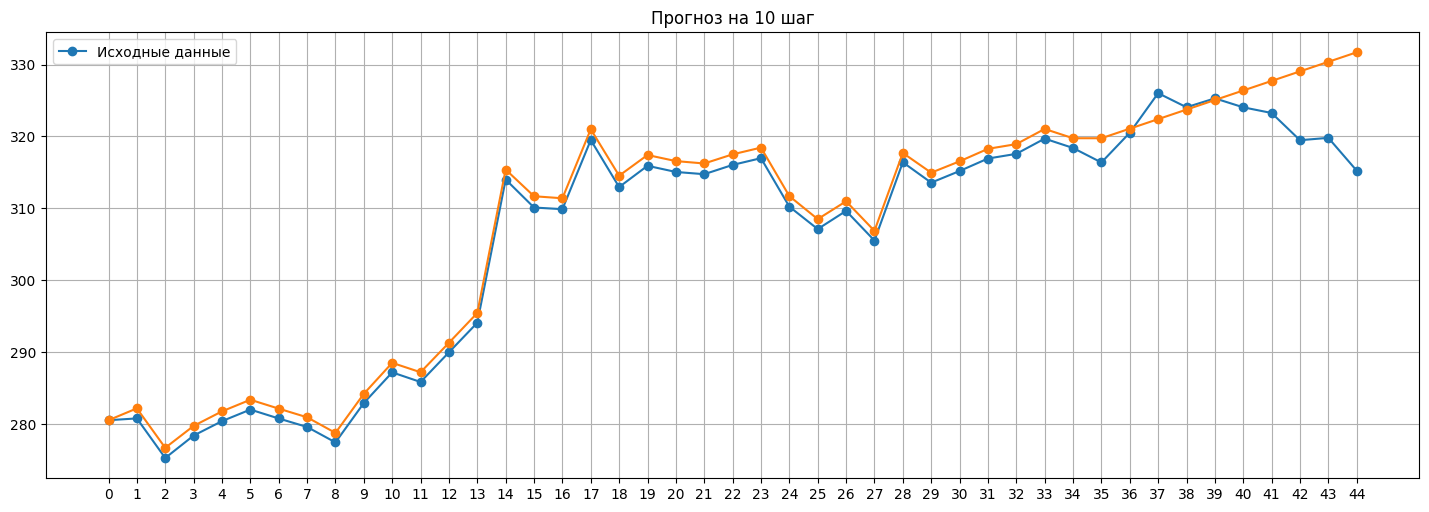

+--------------+-----------------+---------+
| Номер строки | Исходные данные |         |
+--------------+-----------------+---------+
|      0       |     280.49      | 280.49  |
|      1       |     280.74      | 282.137 |
|      2       |     275.23      | 276.645 |
|      3       |     278.35      | 279.696 |
|      4       |     280.36      | 281.723 |
|      5       |     281.97      | 283.339 |
|      6       |     280.73      | 282.102 |
|      7       |     279.55      | 280.896 |
|      8       |      277.4      | 278.721 |
|      9       |     282.88      | 284.166 |
|      10      |     287.15      | 288.477 |
|      11      |     285.81      | 287.167 |
|      12      |     289.94      | 291.27  |
|      13      |     294.06      | 295.418 |
|      14      |      314.0      | 315.384 |
|      15      |      310.1      | 311.67  |
|      16      |     309.87      | 311.387 |
|      17      |      319.5      | 320.998 |
|      18      |     312.95      | 314.53  |
|      19 

In [103]:
# Вывод данных

data_print_main = {
        "Исходные данные": data_main
      }

print_data('Основной датасет', data_print_main, data_print_main)


print('1) Разделили массив данных на три части в отношении 70/20/10')

n, m, v = split_data(data_main)
print(f'len(n) = {len(n)}, len(m) = {len(m)}, len(v) = {len(m)}, len(n+m+v) = {len(n)+len(m)+len(v)}')
print(n)
print('----------------------')
print(m)
print('----------------------')
print(v)
print('----------------------')

print('2) Подбор начальных значений x и y через регрессию')
a1, a2 = regression_initial_values(n)
print(f'а1 = {a1}, a2 = {a2}')

x = np.arange(len(n))
y_regression = a1 + a2 * x

regression_initial_values_ = {
        "Исходные данные": data_main,
        f"Регрессия y = {a2} * x + {a1}": y_regression
      }

print_data('Коэффициенты уравнения линейной регрессии', regression_initial_values_, regression_initial_values_)

print('3) Оптимизация коэффициентов α и β')
alpha, betta = optimize_coefficients(n, a1, a2, step = 0.01)
print(f'alpha = {alpha}, betta = {betta}')

xolf = double_exponential_smoothing_my(data, alpha, betta, a1, a2)

optimize_coefficients_= {
        "Исходные данные": data_main,
        f"Оптимальный подбор коэфф: alpha = {alpha}, betta = {betta}": xolf
      }
print_data('Коэффициенты alpha, betta', optimize_coefficients_, optimize_coefficients_)

print('4) Проверка адекватности модели')
randomness, z_score, normality, p_value_chi_square, autocorrelation, dw_stat, total = check_model_adequacy_1(n, xolf)
print(f'    1. Проверка случайности остатков - {z_score} - {randomness}')
print(f'    2. Проверка нормальности остатков (критерий хи-квадрат Пирсона) - {p_value_chi_square} - {normality}')
print(f'    3. Проверка отсутствия автокорреляции (статистика Дарбина-Уотсона) - {dw_stat} - {autocorrelation}')
print(f'    Итого: {total}')

print('5) Прогнозирование и проверка точности')
print(f'    берем первые 70% ряда')

print('         1. строим прогноз на один шаг и считаем ошибки')
xolf_1 = double_exponential_smoothing_my(data, alpha, betta, a1, a2, steps=0)
xolf_progniz_1= {
        "Исходные данные": n,
        f"Прогноз на один шаг": xolf_1
      }
print_data('Прогноз на один шаг', xolf_progniz_1, xolf_progniz_1)
mae, mse, rmse, mape = calculate_forecast_accuracy(n, xolf_1)
print(f'MAE = {mae:.3f}')
print(f'MSE = {mse:.3f}')
print(f'RMSE = {rmse:.3f}')
print(f'MAPE = {mape:.3f}')

print(f'         2. строим прогноз на {len(m)} шаг и считаем ошибки')
xolf_m = double_exponential_smoothing_my(data, alpha, betta, a1, a2, steps=len(m))
xolf_progniz_1= {
        "Исходные данные": list(n)+list(m),
        f"": xolf_m
      }
print_data(f'Прогноз на {len(m)} шаг', xolf_progniz_1, xolf_progniz_1)
mae, mse, rmse, mape = calculate_forecast_accuracy(list(n)+list(m), xolf_m)
print(f'MAE = {mae:.3f}')
print(f'MSE = {mse:.3f}')
print(f'RMSE = {rmse:.3f}')
print(f'MAPE = {mape:.3f}')

# Вызов функций

Оптимальные коэффициенты: (np.float64(1.0), np.float64(0.0))
Адекватность модели:
Случайность остатков: False
Нормальность остатков: True
Отсутствие автокорреляции: False


/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: Input data has range zero. The results may not be accurate.
  res = hypotest_fun_out(*samples, **kwds)
<ipython-input-69-f7cdc7662436>:108: RuntimeWarning: invalid value encountered in scalar divide
  dw_stat = sum((residuals[i] - residuals[i - 1]) ** 2 for i in range(1, len(residuals))) / sum(r ** 2 for r in residuals)


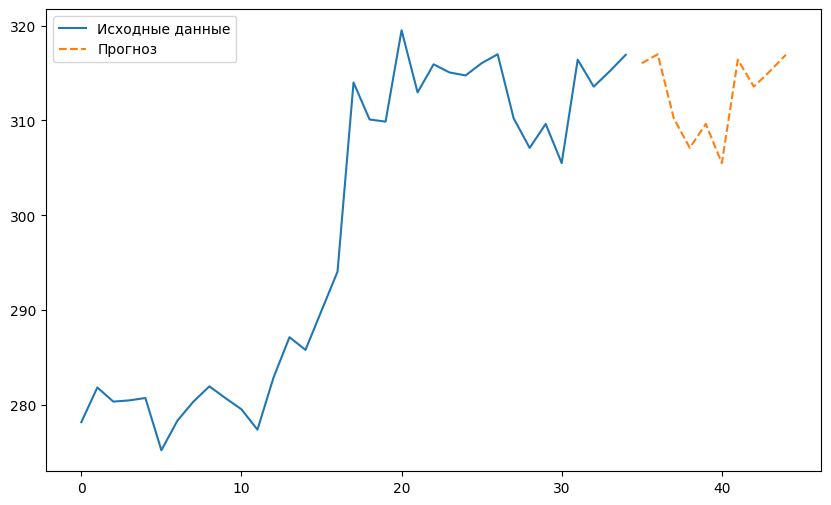

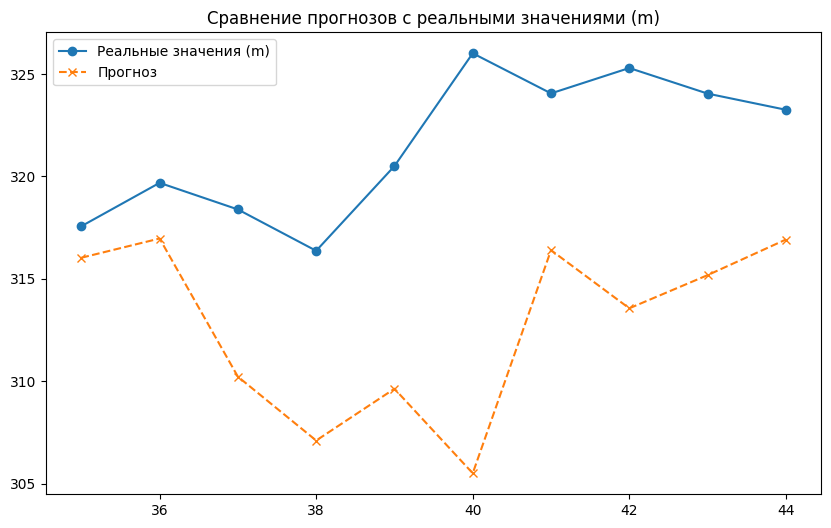

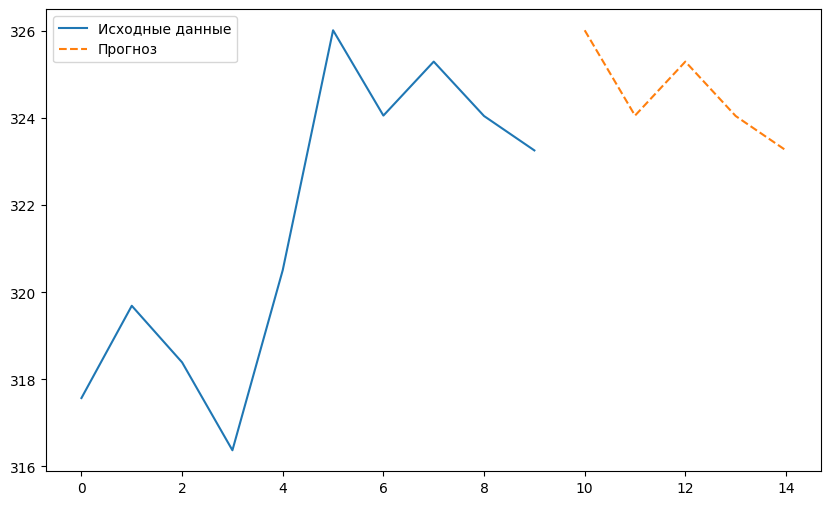

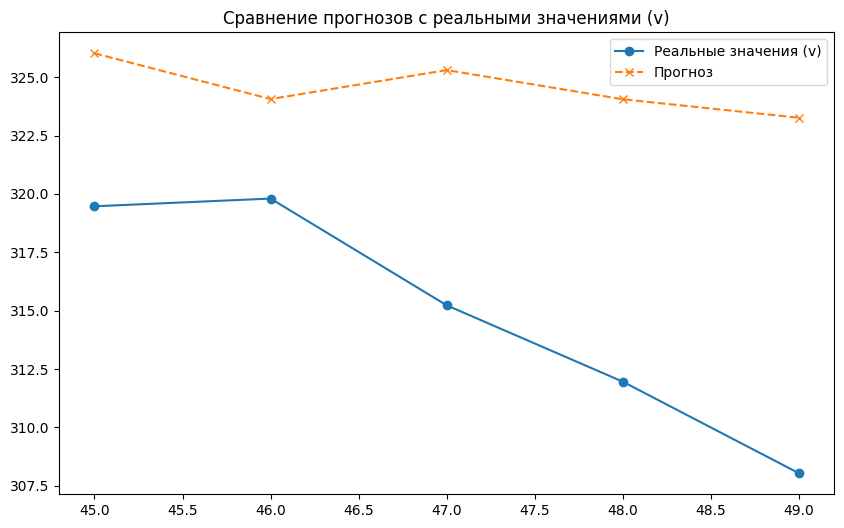

In [69]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import product
from scipy.stats import chi2, shapiro

# 1. Разделение данных
def split_data(data, train_ratio=0.7, validation_ratio=0.2):
    k = len(data)
    if k < 10:
        raise ValueError("Исходный временной ряд слишком короткий. Минимальная длина должна быть >= 10.")
    if train_ratio + validation_ratio >= 1:
        raise ValueError("Сумма train_ratio и validation_ratio должна быть меньше 1.")

    n_size = int(train_ratio * k)
    m_size = int(validation_ratio * k)

    n = data[:n_size]
    m = data[n_size:n_size + m_size]
    v = data[n_size + m_size:]

    return n, m, v

# Пример данных для тестирования
data_main = list(data_main)
n, m, v = split_data(data_main)

# Проверка длины данных
if len(n) == 0 or len(m) == 0 or len(v) == 0:
    raise ValueError("Недостаточная длина данных для обучения, валидации или тестирования.")

# 2. Подбор начальных значений через регрессию
def regression_initial_values(data):
    x = np.arange(len(data))
    y = np.array(data)
    slope, intercept = np.polyfit(x, y, 1)
    return intercept, slope

intercept, slope = regression_initial_values(n)
params_start = (intercept, slope)

# 3. Оптимизация коэффициентов
def optimize_coefficients(data, method, params_coef, params_start, step=0.01):
    if len(data) < 2:
        raise ValueError("Длина временного ряда должна быть >= 2 для выполнения прогнозирования.")

    best_params = None
    min_error = float('inf')

    param_values = [np.arange(0, 1 + step, step) for _ in range(len(params_coef))]

    for params in product(*param_values):
        forecasts = method(data, params, params_start)
        residuals = [data[i] - forecasts[i] for i in range(len(data))]
        error = sum(res ** 2 for res in residuals)
        if error < min_error:
            min_error = error
            best_params = params

    return best_params

# Функция двойного экспоненциального сглаживания
def double_exponential_smoothing_my(data, params_coef, params_start):
    alpha, beta = params_coef
    level, trend = params_start

    forecasts = []
    for i in range(len(data)):
        if i == 0:
            level = data[0]
            trend = 0
        else:
            level_new = alpha * data[i] + (1 - alpha) * (level + trend)
            trend_new = beta * (level_new - level) + (1 - beta) * trend
            level, trend = level_new, trend_new
        forecasts.append(level + trend)
    return forecasts

initial_params_coef = (0.5, 0.5)
best_params_coef = optimize_coefficients(
    data=n,
    method=double_exponential_smoothing_my,
    params_coef=initial_params_coef,
    params_start=params_start,
    step=0.01
)
print("Оптимальные коэффициенты:", best_params_coef)

# 4. Проверка адекватности модели
def check_model_adequacy(data, forecasts):
    residuals = [data[i] - forecasts[i] for i in range(len(data))]

    # 1. Случайность остатков
    turning_points = sum(
        1 for i in range(1, len(residuals) - 1)
        if (residuals[i] > residuals[i - 1] and residuals[i] > residuals[i + 1]) or
           (residuals[i] < residuals[i - 1] and residuals[i] < residuals[i + 1])
    )
    expected_turning_points = (2 * (len(residuals) - 2)) / 3
    variance_turning_points = (16 * len(residuals) - 29) / 90
    z_score = abs((turning_points - expected_turning_points) / np.sqrt(variance_turning_points))
    randomness = z_score < 1.96

    # 2. Нормальность остатков (используем тест Шапиро-Уилка)
    _, p_value_normality = shapiro(residuals)
    normality = p_value_normality > 0.05

    # 3. Автокорреляция
    dw_stat = sum((residuals[i] - residuals[i - 1]) ** 2 for i in range(1, len(residuals))) / sum(r ** 2 for r in residuals)
    autocorrelation = 1.5 < dw_stat < 2.5

    return randomness, normality, autocorrelation

forecasts_n = double_exponential_smoothing_my(
    data=n,
    params_coef=best_params_coef,
    params_start=params_start
)
randomness, normality, autocorrelation = check_model_adequacy(n, forecasts_n)
print("Адекватность модели:")
print(f"Случайность остатков: {randomness}")
print(f"Нормальность остатков: {normality}")
print(f"Отсутствие автокорреляции: {autocorrelation}")

# 5. Прогнозирование на основе ряда n
def forecast_and_evaluate(data, method, coefficients, steps):
    forecasts = method(data, coefficients[:2], coefficients[2:])
    if len(forecasts) < steps:
        raise ValueError("Длина прогнозов меньше, чем количество шагов для прогноза.")
    predictions = forecasts[-steps:]

    plt.figure(figsize=(10, 6))
    plt.plot(range(len(data)), data, label="Исходные данные")
    plt.plot(range(len(data), len(data) + steps), predictions, label="Прогноз", linestyle='--')
    plt.legend()
    plt.show()

    return predictions

steps_m = len(m)
predictions_m = forecast_and_evaluate(
    data=n,
    method=double_exponential_smoothing_my,
    coefficients=(*best_params_coef, *params_start),
    steps=steps_m
)

# 6. Проверка точности модели на ряде m
plt.figure(figsize=(10, 6))
plt.plot(range(len(n), len(n) + len(m)), m, label="Реальные значения (m)", marker='o')
plt.plot(range(len(n), len(n) + len(m)), predictions_m, label="Прогноз", linestyle='--', marker='x')
plt.legend()
plt.title("Сравнение прогнозов с реальными значениями (m)")
plt.show()

# 7. Прогнозирование на основе ряда m
steps_v = len(v)
predictions_v = forecast_and_evaluate(
    data=m,
    method=double_exponential_smoothing_my,
    coefficients=(*best_params_coef, *params_start),
    steps=steps_v
)

# 8. Проверка точности модели на ряде v
plt.figure(figsize=(10, 6))
plt.plot(range(len(n) + len(m), len(n) + len(m) + len(v)), v, label="Реальные значения (v)", marker='o')
plt.plot(range(len(n) + len(m), len(n) + len(m) + len(v)), predictions_v, label="Прогноз", linestyle='--', marker='x')
plt.legend()
plt.title("Сравнение прогнозов с реальными значениями (v)")
plt.show()